In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_cars_data.csv')

In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


There are 7253 rows and 14 columns.

The columns : Mileage, Engine and Power are Objects and have the String notation at the end. It may be useful to change the columns to float for easy manipulation.

In [ ]:
# identifying the columns which has the string Text at the end of the columns
power_cols = []
for colname in data.columns[data.dtypes == 'object']: # only need to consider string columns
    if (data[colname].str.endswith('CC').any()) or (data[colname].str.endswith('km/kg').any()) or (data[colname].str.endswith('kmpl').any()) or (data[colname].str.endswith('bhp').any()): # using `.str` so I can use an element-
        power_cols.append(colname)

print(power_cols)

['Mileage', 'Engine', 'Power']


The three cols : Mileage Engine and Power have string at the End.

In [ ]:
#data=pd.read_csv("/Users/Shared/Relocated_Items/Security/Ram/AI_ML_texas/used_cars_data.csv")

In [ ]:
def mileage_to_num(income_val):
    """This function takes in a string
    and converts it to a number.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(income_val, str): # checks if `income_val` is a string
        if income_val.endswith('CC') or income_val.endswith('km/kg') or income_val.endswith('kmpl') or income_val.endswith('bhp'):
            return float(income_val.replace('CC', '').replace('km/kg', '').replace('kmpl', '').replace('bhp', ''))
    else:   # this happens when the current income is np.nan
        return np.nan

for colname in power_cols:
    data[colname] = data[colname].apply(mileage_to_num)
data[power_cols].head() # good to go!

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


Removign the string at the end for cols Mileage, Engine and Power

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


Engine , Power and Mileage have changed to 'float' now.

In [ ]:
data.describe(include=["category","object"])

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


Location has 11 unique types, Fuel_type has 5 , Transmission has 2 and Owner_type has 4.

**bold text** Checking Categories Names

In [ ]:
data['Location'].unique() # Lists all the unique categories

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

**Univariate Analysis* **bold text**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 864x576 with 0 Axes>

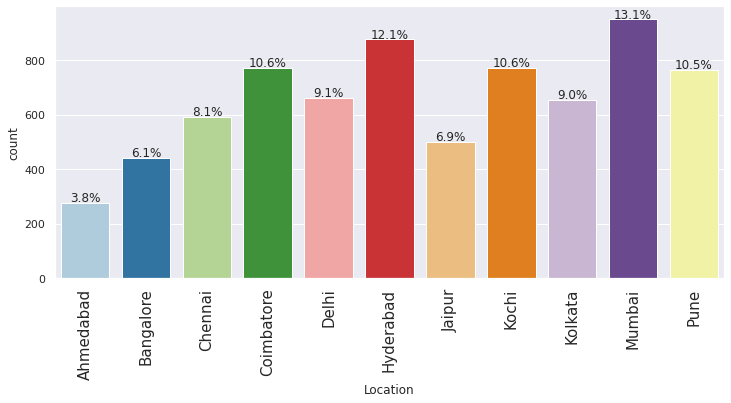

In [ ]:
plt.figure(figsize = (12,8));
labeled_barplot(data, "Location", perc=True);

Mumbai followed by Hydearabad sold highest number of the cars, with Ahmedabad selling lowest number of cars.

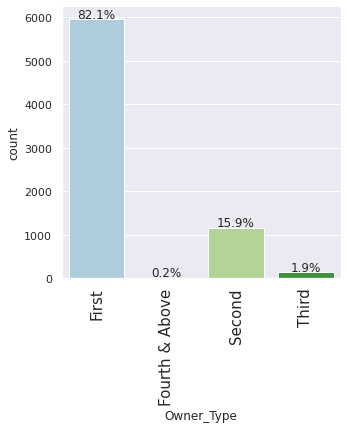

In [ ]:
labeled_barplot(data, "Owner_Type", perc=True)

First time buyers are the most buyers.

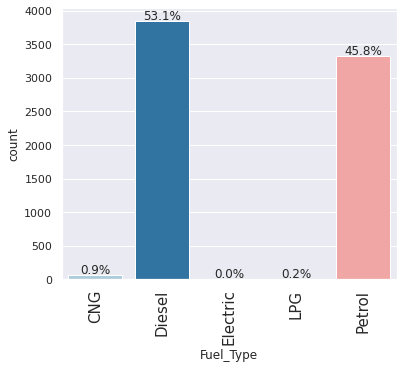

In [ ]:
labeled_barplot(data, "Fuel_Type", perc=True)

Diesel cars are sold account for more than 50% of the cars sold.
Followed by Peterol cars. No electric cars are sold.
CNG are very few.

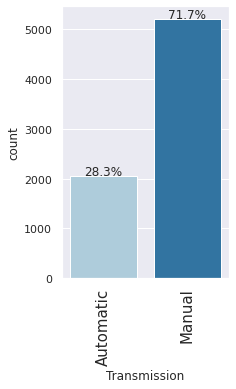

In [ ]:
labeled_barplot(data, "Transmission", perc=True)

Manual cars account more about 72% of the cars sold.

All the lists of categories are shown.

In [ ]:
# COnverting Objects datatypes into category for modeling

data["Location"]=data["Location"].astype("category")
data["Fuel_Type"]=data["Fuel_Type"].astype("category")
data["Transmission"]=data["Transmission"].astype("category")
data["Owner_Type"]=data["Owner_Type"].astype("category")

In [ ]:
data.info() # checking the data type conversions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7200 non-null   float64 
 12  New_Price          7253 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(3), object(1)
memory usage: 596.0+ KB


In [ ]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

Data Cleaning to remove Null Values. We remove null value columns from PRice, Engine, Power, Seats, Price

In [ ]:
data.dropna(subset=["Price"], inplace=True)
# let us reset the dataframe index
data.reset_index(inplace=True, drop=True)
data.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [ ]:
data.dropna(subset=["Engine"], inplace=True)
# let us reset the dataframe index
data.reset_index(inplace=True, drop=True)
data.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                107
Seats                  6
New_Price              0
Price                  0
dtype: int64

In [ ]:
data.dropna(subset=["Power", "Seats", "Mileage"], inplace=True)
# let us reset the dataframe index
data.reset_index(inplace=True, drop=True)
data.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [ ]:
#data.to_csv('/Users/Shared/Relocated_Items/Security/Ram/AI_ML_texas/cars_edited.csv',index=False); # saving the changes made to the data

In [ ]:
data.head() # checking the data if the chanegs are implemented

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


In [ ]:
data.duplicated().sum() # checking for Dupes. No dupes identifed

0

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3152
Petrol      2655
CNG           55
LPG           10
Electric       0
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       4170
Automatic    1702
Name: Transmission, dtype: int64
--------------------------------------------------
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
--------------------------------------------------


In [ ]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Mumbai        0.131982
Hyderabad     0.122275
Kochi         0.109843
Coimbatore    0.107119
Pune          0.101158
Delhi         0.092813
Kolkata       0.088726
Chennai       0.081063
Jaipur        0.068460
Bangalore     0.059094
Ahmedabad     0.037466
Name: Location, dtype: float64
--------------------------------------------------
Diesel      0.536785
Petrol      0.452146
CNG         0.009366
LPG         0.001703
Electric    0.000000
Name: Fuel_Type, dtype: float64
--------------------------------------------------
Manual       0.71015
Automatic    0.28985
Name: Transmission, dtype: float64
--------------------------------------------------
First             0.824080
Second            0.157527
Third             0.017200
Fourth & Above    0.001192
Name: Owner_Type, dtype: float64
--------------------------------------------------


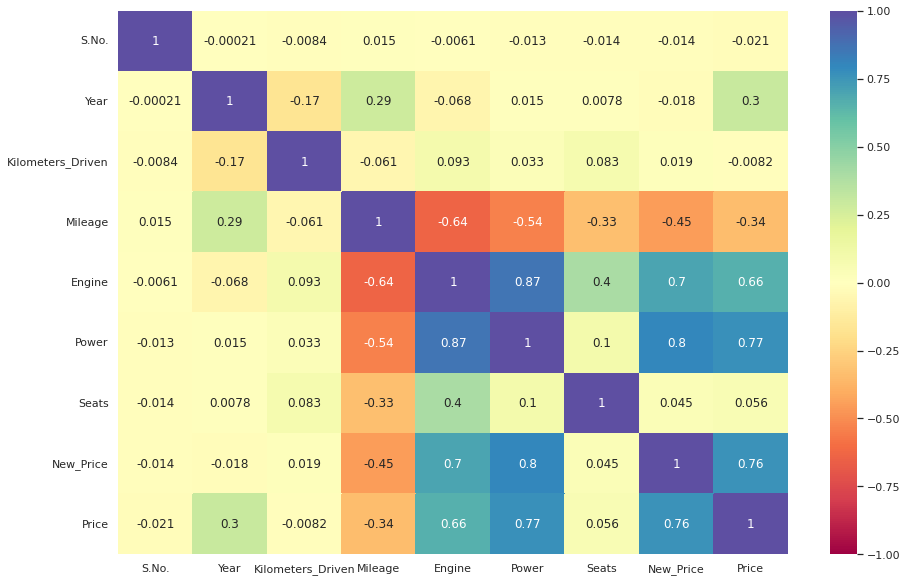

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Pearsons co-eff gives the follwing useful info:

Engine and Power have highest corelation= 0.86
Power and New car price ('New_price') have corelation of 0.8
Power and Used car price ('Price') have a corelation of 0.77
Engine and New car price has a corleaiton of 0.7
Engine and used car price has a corelaiton of 0.66.
Year has a corleation of 0.31 for used cars.
New_car price has a corelation of 0.76 with old car price

Mileage and Price has negative corelation

For regression models for the outcome 'Price' the important dependent variables are Engine, Power, Year

In [ ]:
cData=data

In [ ]:
cData.shape

(5872, 14)

Hot Coding the categorical values for Modeling

In [ ]:
# Replacing the Location  var with actual values
cData['Location'] = cData['Location'].replace({1: 'Mumbai', 2: 'Hyderabad', 3: 'Kochi',  4: 'Coimbatore', 5: 'Pune',  6: 'Delhi', 7: 'Kolkata', 8: 'Chennai',  9: 'Jaipur', 10: 'Bangalore' , 11: 'Ahmedabad'})
cData.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74


In [ ]:
cData = pd.get_dummies(cData, columns=['Location'])
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,0,0,0,0,1,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,0,0,0,0,1
2,2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,1,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Also replacing the Fuel_type var with actual values
cData['Fuel_Type'] = cData['Fuel_Type'].replace({1: 'Diesel', 2: 'Petrol', 3: 'CNG',  4: 'LPG'})
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,0,0,0,0,0,0,0,0,1,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,0,0,0,0,0,0,0,0,0,1
2,2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,0,1,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,0,1,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
cData = pd.get_dummies(cData, columns=['Fuel_Type'])
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,2010,72000,Manual,First,26.60,998.0,58.16,5.0,...,0,0,0,1,0,1,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Manual,First,19.67,1582.0,126.20,5.0,...,0,0,0,0,1,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,0,1
3,3,Maruti Ertiga VDI,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,...,0,0,0,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Also replacing the Transmission var with actual values
cData['Transmission'] = cData['Transmission'].replace({1: 'Manual', 2: 'Automatic'})
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,2010,72000,Manual,First,26.60,998.0,58.16,5.0,...,0,0,0,1,0,1,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Manual,First,19.67,1582.0,126.20,5.0,...,0,0,0,0,1,0,1,0,0,0
2,2,Honda Jazz V,2011,46000,Manual,First,18.20,1199.0,88.70,5.0,...,0,0,0,0,0,0,0,0,0,1
3,3,Maruti Ertiga VDI,2012,87000,Manual,First,20.77,1248.0,88.76,7.0,...,0,0,0,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Automatic,Second,15.20,1968.0,140.80,5.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
cData = pd.get_dummies(cData, columns=['Transmission'])
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,First,26.60,998.0,58.16,5.0,5.51,...,0,1,0,1,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,First,19.67,1582.0,126.20,5.0,16.06,...,0,0,1,0,1,0,0,0,0,1
2,2,Honda Jazz V,2011,46000,First,18.20,1199.0,88.70,5.0,8.61,...,0,0,0,0,0,0,0,1,0,1
3,3,Maruti Ertiga VDI,2012,87000,First,20.77,1248.0,88.76,7.0,11.27,...,0,0,0,0,1,0,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Second,15.20,1968.0,140.80,5.0,53.14,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Also replacing the Transmission var with actual values
cData['Owner_Type'] = cData['Owner_Type'].replace({1: 'First', 2: 'Second', 3: 'Third'})
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0,Maruti Wagon R LXI CNG,2010,72000,First,26.60,998.0,58.16,5.0,5.51,...,0,1,0,1,0,0,0,0,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,First,19.67,1582.0,126.20,5.0,16.06,...,0,0,1,0,1,0,0,0,0,1
2,2,Honda Jazz V,2011,46000,First,18.20,1199.0,88.70,5.0,8.61,...,0,0,0,0,0,0,0,1,0,1
3,3,Maruti Ertiga VDI,2012,87000,First,20.77,1248.0,88.76,7.0,11.27,...,0,0,0,0,1,0,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Second,15.20,1968.0,140.80,5.0,53.14,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
cData = pd.get_dummies(cData, columns=['Owner_Type'])
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,5.51,1.75,...,0,0,0,0,0,1,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.50,...,1,0,0,0,0,1,1,0,0,0
2,2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,...,0,0,0,1,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.00,...,1,0,0,0,0,1,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.74,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5872 non-null   int64   
 1   Name               5872 non-null   object  
 2   Location           5872 non-null   category
 3   Year               5872 non-null   int64   
 4   Kilometers_Driven  5872 non-null   int64   
 5   Fuel_Type          5872 non-null   category
 6   Transmission       5872 non-null   category
 7   Owner_Type         5872 non-null   category
 8   Mileage            5872 non-null   float64 
 9   Engine             5872 non-null   float64 
 10  Power              5872 non-null   float64 
 11  Seats              5872 non-null   float64 
 12  New_Price          5872 non-null   float64 
 13  Price              5872 non-null   float64 
dtypes: category(4), float64(6), int64(3), object(1)
memory usage: 482.7+ KB


Now all the columns are integres, cats or floats -Good for Modeling

In [ ]:
len(cData.columns)

32

The columns are increased form 16 to 31 now.

In [ ]:
cData.dtypes

S.No.                          int64
Name                          object
Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
New_Price                    float64
Price                        float64
Location_Ahmedabad             uint8
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_CNG                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Automatic         uint8
T

**bold text**We want to Find teh unique Brand names


In [ ]:
name_df = pd.DataFrame(
    cData.Name.str.split(", ", expand=True).values.flatten(), columns=["Name"]
)

In [ ]:
name_df["Name"].value_counts() # Chcceking the number of cars sold for each Name of the car

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Ritz VDi                        30
                                       ..
Hyundai i20 2015-2017 1.4 Magna ABS     1
Ford EcoSport 1.5 Petrol Trend          1
Volvo XC90 2007-2015 D5 AWD             1
Mahindra Scorpio S2 7 Seater            1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1811, dtype: int64

In [ ]:
name_df = pd.DataFrame(
    cData.Name.str.split(", ", expand=True).values.flatten(), columns=["Name"]
)
val_c = name_df.Name.value_counts()
val_c

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Ritz VDi                        30
                                       ..
Hyundai i20 2015-2017 1.4 Magna ABS     1
Ford EcoSport 1.5 Petrol Trend          1
Volvo XC90 2007-2015 D5 AWD             1
Mahindra Scorpio S2 7 Seater            1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1811, dtype: int64

In [ ]:
# we take 21 as threshold to use for analysis as the number of cars sold for each Name
threshold = 21
val_c[val_c.values >= threshold]

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Hyundai Grand i10 Sportz      27
Honda Amaze S i-Dtech         27
Maruti Ertiga VDI             25
Honda Brio S MT               25
Honda City 1.5 V MT           24
Maruti Wagon R VXI            23
Hyundai Verna 1.6 SX          23
Maruti Wagon R LXI            22
Maruti Alto LXi               21
Name: Name, dtype: int64

In [ ]:
# list of cars which are used for Modeling which are sold 20 or more
names_list = val_c[val_c.values >= threshold].index.tolist()
print("Names taken into consideration:", len(names_list), names_list)

Names taken into consideration: 16 ['Mahindra XUV500 W8 2WD', 'Maruti Swift VDI', 'Honda City 1.5 S MT', 'Maruti Swift Dzire VDI', 'Maruti Ritz VDi', 'Hyundai i10 Sportz', 'Toyota Fortuner 3.0 Diesel', 'Hyundai Grand i10 Sportz', 'Honda Amaze S i-Dtech', 'Maruti Ertiga VDI', 'Honda Brio S MT', 'Honda City 1.5 V MT', 'Maruti Wagon R VXI', 'Hyundai Verna 1.6 SX', 'Maruti Wagon R LXI', 'Maruti Alto LXi']


In [ ]:
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,5.51,1.75,...,0,0,0,0,0,1,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.50,...,1,0,0,0,0,1,1,0,0,0
2,2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,...,0,0,0,1,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.00,...,1,0,0,0,0,1,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.74,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
workrt = cData['Name'].str.split(" ", n = 1, expand = True)  # we want to split the Name of the car into Two parts (Brand, Model) so that we can pick all the Brand Names .
#df.Name.str.extract(Brand, Model)', expand=True),

In [ ]:
workrt.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [ ]:
cData["Brand"]= workrt[0]
cData["Model"]= workrt[1]

In [ ]:
cData.head()

,S.No.,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,...,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand,Model
0,0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,5.51,1.75,...,0,0,0,1,1,0,0,0,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.50,...,0,0,0,1,1,0,0,0,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.50,...,0,1,0,1,1,0,0,0,Honda,Jazz V
3,3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.00,...,0,0,0,1,1,0,0,0,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.74,...,0,0,1,0,0,0,1,0,Audi,A4 New 2.0 TDI Multitronic


In [ ]:
cData['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [ ]:
cData.groupby(['Brand']).sum(). # We now group the data into the Brand Names

SyntaxError: ignored

In [ ]:
cData.groupby(['Brand','Model']).sum() # Now we are classifying Each Brand and Model

In [ ]:
len(cData.columns)

In [ ]:
# Also replacing the Brand l var with actual values
cData['Brand'] = cData['Brand'].replace({1: 'Maruti', 2: 'Hyundai', 3: 'Honda',  4: 'Toyota', 5: 'Pune',  6: 'Mercedes-Benz', 7: 'Volkswagen', 8: 'Ford', 9: 'Mahindra', 10: 'BMW', 11: 'Audi', 12: 'Tata', 13: 'Skoda', 14: 'Renault', 15: 'Chevrolet',  16: 'Nissan', 17: 'Land',  18: 'Jaguar', 19: 'Mitsubishi', 20: 'Mini', 21: 'Fiat', 22: 'Volvo', 23: 'Porsche', 24: 'Jeep', 25: 'Datsun', 26: 'Force', 27: 'ISUZU',  28: 'Ambassador', 29: 'Isuzu',  30: 'Bentley', 31: 'Lamborghini',  })
cData.head()

In [ ]:
cData = pd.get_dummies(cData, columns=['Brand'])
cData.head()

In [ ]:
len(cData.columns)

In [ ]:
cData.dtypes

In [ ]:
cData.info() # confimrind the Hot encoding for all the variables

In [ ]:
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [ ]:
# identifying the columns which has the string Text at the end of the columns
power_cols = []
for colname in cData.columns[cData.dtypes == 'object']: # only need to consider string columns
    if (cData[colname].str.endswith('CC').any()) or (cData[colname].str.endswith('km/kg').any()) or (cData[colname].str.endswith('kmpl').any()) or (cData[colname].str.endswith('bhp').any()): # using `.str` so I can use an element-
        power_cols.append(colname)

print(power_cols)

In [ ]:
def mileage_to_num(income_val):
    """This function takes in a string present in Mileage, Engine and Fuel """
    if isinstance(income_val, str): # checks if `income_val` is a string
        if income_val.endswith('CC') or income_val.endswith('km/kg') or income_val.endswith('kmpl') or income_val.endswith('bhp'):
            return float(income_val.replace('CC', '').replace('km/kg', '').replace('kmpl', '').replace('bhp', ''))
    else:   # this happens when the current income is np.nan
        return np.nan

for colname in power_cols:
    cData[colname] = cData[colname].apply(mileage_to_num)
cData.head() # good to go!

Bivariate Analysis **bold text**

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Location", y="Price", data=data)
plt.show()


Most of the cars sold are under 20 Lakhs. Banaglore and Coimbatore sold sligthly expensive cars. However, Hyderabd sold the most expensive used car, followed by the next expensive car sold from Delhi and Kochi. The Median Price of the used car for bangalore is sligly more than the other cities. Jaiput. KOlcata and Pune has lower Median price of the used car.  



In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Location", y="New_Price", data=data)
plt.show()

Bangalore sells slightly pricier new cars (About 40 lkhs) while Pune sells the least expensive New car.  Coimbatore ranks second followed by Delhi in terms of selling expensive cars of range closer to 30 lahs to 40 lakhs.  Pune and Jaiput sold the least expensive cars .


Hyderabd sold the most expensive  New car.  Similar to used car market, Coimbatore and Bangalore sold broad variety of prices of cars, and the least price variety is in Kolcata.



In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Fuel_Type", y="Price", data=data)
plt.show()



USed Diesel cars are pricier than petrol cars. The most expensive Diesel car is about 160 lakhs. LPG cars are the least nu. of cars sold and are very economical. CNG cars are a also low economy cars,
Almost No Electric cars are sold


In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Fuel_Type", y="New_Price", data=data)
plt.show()

For  New car price: The cost is highest for Petrol cars for New cars and the least is LPG.  New Car prices are higher for Diesel cars than the petrol cars.
Very few CNG   New Cars are sold.
A few New cars are sold for Electric fuel. LEast cars are from LPG for new cars.


In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Owner_Type", y="Price", data=data)
plt.show()

First owner bought slighlty expensive cars than the second owner. Most of the owners bought lest than 15 lakh used cars.  The third owner used car price is lower than the Median price of the First and Second owner.
FOurth and above owners have bought inexpenve cars.

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="Owner_Type", y="New_Price", data=data)
plt.show()

For the new car and used car First owner had the most expensive car,
THe price for both the new cars and the used cars is higher for First owner and least for the Thrid owner.


In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Transmission", y="Price", data=data)
plt.show()

USed Automatic cars cost start well above the max price for the manual cars. Infact, automatic cars Median price is more than the upper quartile of the Manual cars.
One of The most expensive car seems to come from Automatic cars

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Transmission", y="New_Price", data=data)
plt.show()

Both for the used cars and the new cars AUtomatic cars are lot more expensive than Manual cars.

The Median Price for the used car is about 18 lakhs, and for new car is close to 50 lakhs.  
In contrast the manual car price is less than 10 lakhs for both used and New Manual cars

In [ ]:
# lets build our linear model
# independant variables
X = cData.drop(['Price','Name','Model'], axis=1)
# the dependent variable
y = cData[['Price']]

In [ ]:
 #Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [ ]:
cData.head()

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_train, y_train)

R2 for the Traing model is 0.78

In [ ]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

R2 for the Traing model is 0.79. Better fit .

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

About 78 % of the total variability in the Training model is explained by the Model. While about 5.27% of the variability CANNOT be expliained by the model.
The Residual error is about 2.84.  The adjuested R2 also says that the model predictor variables are able to predict about 78% of the fit.

In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

 Overall sliglt improvement between the train and test data for the used car price.  About 79 % of the total variability in the Training model is explained by the Model. While about 5% of the variability CANNOT be expliained by the model.
The Residual error is about 2.75.  The adjuested R2 also says that the model predictor variables are able to predict about 79% of the fit.

In [ ]:
regression_model.coef_

In [ ]:
np.max(regression_model.coef_)

The train and test 𝑅2 are 0.78 and 0.79, indicating that the model explains 78% and 79% of the total variation in the train and test sets respectively. Also, both scores are comparable, so no overfitting. Testing data has slightly better R2 than training data. RMSE values on the train and test sets are also comparable (5.2 Vs 5.0) This shows that the model is not overfitting. MAE indicates that our current model is able to predict anime ratings within a mean error of 2.84 We did not get MAPE as there could be 0 values or outliers in the data. However, the overall performance is good.

In [ ]:
# function to plot a boxplot and a histogram along the same scale .


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=cData, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=cData, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=cData, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        cData[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        cData[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
histogram_boxplot(cData, "Price")

Used car price is Rt. skewed.

In [ ]:
cData["Price"] = cData["Price"].apply(np.log). # Log transforming the Price variable

In [ ]:
histogram_boxplot(cData, "Price")

After log transformation, the used car has more or less normal distribution.

In [ ]:
histogram_boxplot(cData, "New_Price")

In [ ]:
cData["New_Price"] = cData["New_Price"].apply(np.log). # Log transforming the Price variable

In [ ]:
cData.dtypes

In [ ]:
# lets build our linear model
# independant variables
X = cData.drop(['Price','Name','Model'], axis=1)
# the dependent variable
y = cData[['Price']]

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    print("The exponetial for {} is {}\n".format(col_name, np.exp(regression_model.coef_[0][idx])))

In [ ]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_train, y_train)

In [ ]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

This is a huge imporvement from the non-transformed "Price".  93% of the variability is explained with this model.

In [ ]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

With Log Transformation of the used car Price we have considerably increased the R2. 92% of variability of the New Price is explained by the model.
The unexplained part of the model is only 0.23%. Mean Absolute error is only about 0.17.  


In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

 Log Transformation of the used car Price with the Test data shows a slightly better performance suggesting good fit and no overfitting.  93% of variability of the Price is explained by the model.
The unexplained part of the model is only 0.22%. Mean Absolute error is only about 0.17.  

Problem Def and EDA:
Indian car market has a great demand for cars- Both New cars and used cars.  We want to explore the price of the used and new car in terms of the following major categories:

Locations:


City Name	No. Of Cars 	% of cars
Mumbai	775   	13 %
Hyderabad	718	12
Kochi	645	10.6
Coimbatore	629	10.6
Pune	594	10.5
Delhi	545	9.1
Kolkata	521	9
Chennai	476	8.1
Jaipur	402	0.6
Bangalore	347	0.6
Ahmedabad	220	0.3

Fuel Type of Car Petrol vs. Diesel

Fuel Type	No. Of Cars sold Vs. % 	%
Diesel	3152	53%
Petrol	2655	45
CNG	55	0.08
LPG	10	0.01
Electric	None


Transmission Type	No. Of Cars sold Vs. % 	%
Manual	4170	71
Automatic	1702	28
Owner_type	No. Of Cars sold Vs. % 	%
First	4839	82%
Second	925	15
Third	101	0.18
Fourth and above	7	0.001

Mumbai has the highest number of cars sold (775) followed by Hyderabad (718) . These two cities account to 25% of the total cars sold. About 82% of the cars bought are by the first owner,   and about half the cars ( 53%)  of the cars sold are Diesel ,  and 71% of the cars are Manual.  

When we looked at the attributes of the car ( S.No, Year, Kms driven, Mileage, Engine, Power, No. Of seats) to the car price (old and New) we found,  
Pearsons co-eff gives the follwing useful info:
Engine and Power have highest corelation= 0.86 Power and New car price ('New_price') have corelation of 0.8 Power and Used car price ('Price') have a corelation of 0.77 Engine and New car price has a corleaiton of 0.7 Engine and used car price has a corelaiton of 0.66. Year has a corleation of 0.31 for used cars. New_car price has a corelation of 0.76 with old car price
Mileage and Price has negative corelation
For regression models for the outcome 'Price' the important dependent variables are Engine, Power, Year

Top Three cars sold :  There are three cars: Landcruiser (New) , Lamborghini (Third owner) and Jaguar (New) are the expensive cars.
Top Five Brands Sold:
Car Name	No. Sold
Mahindra XUV500 W8 2WD	49
Maruti Swift VDI   	45
Honda City 1.5 S MT 	34
Maruti Swift Dzire VDI  	34
Maruti Ritz VDi   	30

 21 or more cars sold and their numbers:

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Hyundai Grand i10 Sportz      27
Honda Amaze S i-Dtech         27
Maruti Ertiga VDI             25
Honda Brio S MT               25
Honda City 1.5 V MT           24
Maruti Wagon R VXI            23
Hyundai Verna 1.6 SX          23
Maruti Wagon R LXI            22
Maruti Alto LXi               21

Unique Brand of cars sold :

Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'
      
No. of cars taken into consideration for Modeling
Names taken into consideration for Modeling: 16 ['Mahindra XUV500 W8 2WD', 'Maruti Swift VDI', 'Honda City 1.5 S MT', 'Maruti Swift Dzire VDI', 'Maruti Ritz VDi', 'Hyundai i10 Sportz', 'Toyota Fortuner 3.0 Diesel', 'Hyundai Grand i10 Sportz', 'Honda Amaze S i-Dtech', 'Maruti Ertiga VDI', 'Honda Brio S MT', 'Honda City 1.5 V MT', 'Maruti Wagon R VXI', 'Hyundai Verna 1.6 SX', 'Maruti Wagon R LXI', 'Maruti Alto LXi']

Bivariate Analysis of the Categorical Variables and Price of the New Car and Old car.

Used Cars Vs.  Car Price:
Most of the cars sold are under 20 Lakhs. Banaglore and Coimbatore sold sligthly expensive cars. However, Hyderabd sold the most expensive used car, followed by the next expensive car sold from Delhi and Kochi. The Median Price of the used car for bangalore is sligly more than the other cities. Jaiput. KOlcata and Pune has lower Median price of the used car.  

New Cars Vs.  Car Price:
Bangalore sells slightly pricier new cars (About 40 lkhs) while Pune sells the least expensive New car.  Coimbatore ranks second followed by Delhi in terms of selling expensive cars of range closer to 30 lahs to 40 lakhs.  Pune and Jaiput sold the least expensive cars . Hyderabd sold the most expensive  New car.  Similar to used car market, Coimbatore and Bangalore sold broad variety of prices of cars, and the least price variety is in Kolcata.

Fuel_Type Vs. Car Price
Used Diesel cars are pricier than petrol cars. The most expensive Diesel car is about 160 lakhs. LPG cars are the least nu. of cars sold and are very economical. CNG cars are a also low economy cars,
Almost No Electric cars are sold

For  New car price: The cost is highest for Petrol cars for New cars and the least is LPG.  New Car prices are higher for Diesel cars than the petrol cars.
Very few CNG   New Cars are sold.
A few New cars are sold for Electric fuel. LEast cars are from LPG for new cars.

Owner-type:
First owner bought slighlty expensive cars than the second owner. Most of the owners bought lest than 15 lakh used cars.  The third owner used car price is lower than the Median price of the First and Second owner.
FOurth and above owners have bought inexpenve cars.

For the new car and used car First owner had the most expensive car, THe price for both the new cars and the used cars is higher for First owner and least for the Thrid owner.


Transmission Type:
Used Automatic cars cost start well above the max price for the manual cars. Infact, automatic cars Median price is more than the upper quartile of the Manual cars.
One of The most expensive car seems to come from Automatic cars

Recommendations:

Bangalore and Coimabtore sell expensive cars.



Model 1 Price with out transformation

Intercept for our model is -2107.2745831587104

Training Performance
	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	5.277427	2.842829	0.783986	0.780839	NaN

Test Performance
	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	5.024656	2.754044	0.791208	0.78397	NaN


Log Transformed Price only

 Intercept:  -254.86038538483135

Training Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.237578	0.175717	0.92571	0.924628	NaN
Test Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.223908	0.174827	0.92988	0.927449	NaN
R2:
 R-Sqaured is the proportion of the total variability of the model (MAE ) that is accounted for by the model/predictor variables. Thus the fitted values summarizes all the information that the predictors supply about the Price. Thus, it represents the correlation between the outcome and the fitted values.

With Log Transformation of the Price we have considerably increased the R2.
In The Training data we are able to explain 78% of variability of the Price is explained by the model we built with the ‘Price-as is’ using the X variables.  .  This has increased to 92% with log transformation.
Thus,  we are able to explain 92% of the variability in price in the model we built using  with the log transformed Price.

Test data, ( 0.78 to 0.79 and 0.92 to 0.93) show better performance (albeit very little) than the training data suggesting no overfitting. . However, between two training models,  R2 is increased between ‘Price-as is’ vs. ‘Log Transformed Price’ 79% to 93%

MAE  or Total Sum of Squares captures the total variability of the outcome about its mean.  
Mean Absolute errors have also decreased from 2.84 to 2.75 in the ‘Price-as is’ model between train and test data. While it has considerably decreased to 0.17 .  Lower is better

RMSE or Residual Sum of Squares:
  For the “Price as -is” model the % of the variability CANNOT be  explained after regression is 5.27%  for test data and for train it has decreased to “5%”-
While the % of variability that CANNOT be explained for log-Transformed Price is 0.23 % for Test data and slightly reduced for the train data to 0.22%. Between Train and Test data, it has changed from 5% to 0.22%. Lower value is a better fit model.

Adjusted R2:
Has increased from 92.4%  to 92.7%  suggesting the independent variables belong to the model . Higher than the
A higher Adjusted R2 suggests that the model fits well, including all important x variables (predictors). While I did not prior select the candidate predictors, but the fact that the test data has slightly better R2 suggests that the predictors we have chosen have resulted in good model. Sometimes, choosing the predictors priori also results in overfitting.

Intercept: The negative intercept in this model suggests that the “the model is overestimating on an average the y values”  .  The Price of the car (in theory)  is  -2107  lower (absurd) when all the X variables are zero.  


Log Transformed Price with Year Categories :  ( Regression Analysis NOT shown as the file is getting too big and is crashing >>)
(We have categorized the “Year” variable with the hope to a better fit. The R2 have not changed much with the categories.
No not worth categorizing.

The MAE have increased in the Test model suggesting .

Intercept :   0.45479463078883664
Training Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.233941	0.174499	0.927968	0.926537	NaN
Test Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.224187	0.176285	0.929705	0.926359	NaN


Removing Outliers from the Price above 4.6.

(We removed three rows as a measure to treat outliers with the hope that we can improve R2 and perhaps have values for MAPE.
Not much change in the  model performance .
intercept for our model is 0.49.

Training Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.233873	0.175374	0.926795	0.92534	NaN


Test Performance

	RMSE	MAE	R-squared	Adj. R-squared	MAPE
0	0.224656	0.173767	0.9308	0.927505	NaN


Co-Efficients: Gives the change in the Price for an increase in one UNIT of predictor (assuming al other X variables remain constant.
For instance, in case of the output “ The coefficient for Mileage is -0.017989790986229957” -suggests the  “Price” of the car decreases by 0.17% for every 1 mile increase assuming that all the other X variables are held constant.  It is important to note that the interpretation of coefficients makes sense only with we observe the 95% CI (confidence intervals) and P value. In the absence of these we really cannot interpret the coefficients.

Taking another example “The coefficient for New_Price is 0.0032436752446883266” suggests that for every one unit change in the “New Car Price” the “Price “ of the car increases by 0.3%.

Note: The co-efficents of the Log transformed price cannot be interpreted directly. We need to exponentiate them before they can be interpreted.

Slope: Need to calculate the slope.
